# Preprocessing

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
df.shape

(21613, 21)

In [61]:
names = list(df.columns)
names

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [62]:
types = df.dtypes
types

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [63]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in range(len(types)):
    if types[i] == 'object':
        LE.fit_transform(df[names[i]])
        df[names[i]] = LE.transform(df[names[i]])

In [64]:
data = df.values
data[:2]

array([[ 7.12930052e+09,  1.64000000e+02,  2.21900000e+05,
         3.00000000e+00,  1.00000000e+00,  1.18000000e+03,
         5.65000000e+03,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.00000000e+00,  7.00000000e+00,
         1.18000000e+03,  0.00000000e+00,  1.95500000e+03,
         0.00000000e+00,  9.81780000e+04,  4.75112000e+01,
        -1.22257000e+02,  1.34000000e+03,  5.65000000e+03],
       [ 6.41410019e+09,  2.20000000e+02,  5.38000000e+05,
         3.00000000e+00,  2.25000000e+00,  2.57000000e+03,
         7.24200000e+03,  2.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.00000000e+00,  7.00000000e+00,
         2.17000000e+03,  4.00000000e+02,  1.95100000e+03,
         1.99100000e+03,  9.81250000e+04,  4.77210000e+01,
        -1.22319000e+02,  1.69000000e+03,  7.63900000e+03]])

In [65]:
x = df.drop(columns=['price']).values
y = df['price'].values
x.shape,y.shape

((21613, 20), (21613,))

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled[0]

array([0.72010308, 0.44204852, 0.09090909, 0.125     , 0.06716981,
       0.00310751, 0.        , 0.        , 0.        , 0.5       ,
       0.5       , 0.09758772, 0.        , 0.47826087, 0.        ,
       0.89393939, 0.57149751, 0.21760797, 0.16193426, 0.00574235])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, random_state = 42, test_size=0.25)

# KNN

In [68]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [69]:
Y_predict = KNN.predict(X_test)

In [70]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

5399


In [71]:
Y_test.shape

(5404,)

### Evaluating Model

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
knn_mae=int(mean_absolute_error(Y_test, Y_predict))
knn_mse=int(mean_squared_error(Y_test, Y_predict))
knn_rmse=int(math.sqrt(mean_squared_error(Y_test, Y_predict)))
knn_mae,knn_mse,knn_rmse

(104805, 41803703414, 204459)

# Linear regression

In [73]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_train,Y_train)
LR.score(X_test,Y_test)

0.705885441741025

In [74]:
Y_predict = LR.predict(X_test)

In [75]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

5404


In [76]:
Y_test.shape

(5404,)

### Evaluating Model

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
LR_mae=int(mean_absolute_error(Y_test, Y_predict))
LR_mse=int(mean_squared_error(Y_test, Y_predict))
LR_rmse=int(math.sqrt(mean_squared_error(Y_test, Y_predict)))
LR_mae,LR_mse,LR_rmse

(126355, 43995898047, 209751)

# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [79]:
Y_predict = dt.predict(X_test)

In [80]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

5346


In [81]:
Y_test.shape

(5404,)

### Evaluating Model

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
dt_mae=int(mean_absolute_error(Y_test, Y_predict))
dt_mse=int(mean_squared_error(Y_test, Y_predict))
dt_rmse=int(math.sqrt(mean_squared_error(Y_test, Y_predict)))
dt_mae,dt_mse,dt_rmse

(104808, 42953775453, 207252)

# PLOTING

Text(0.5, 1.0, 'Decision treee')

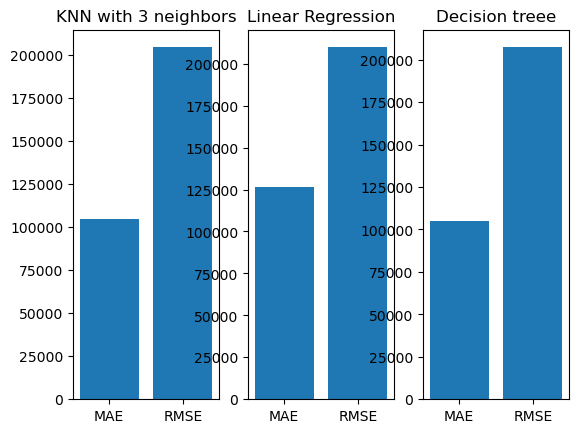

In [83]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['MAE','RMSE']

ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

knn_values = [knn_mae,knn_rmse]

LR_values = [LR_mae,LR_rmse]

dt_values = [dt_mae,dt_rmse]

ax1.bar(labels,knn_values)
ax1.set_title('KNN with 3 neighbors')

ax2.bar(labels,LR_values)
ax2.set_title('Linear Regression')

ax3.bar(labels,dt_values)
ax3.set_title('Decision treee')

In [84]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
print(Y_train[:2])

MemoryError: Unable to allocate 465. GiB for an array with shape (16209, 7700001) and data type float32

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1))
model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquared,  metrics = ['accuracy'])